In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sb
import math
from datetime import datetime, timedelta

In [2]:
sb.set_style('darkgrid')

In [3]:
df = pd.read_csv('./soc-sign-bitcoinotc.csv', header=None)
df.columns = [ 'source', 'target', 'rating', 'time' ]
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s') 

In [8]:
df_sample1 = df.set_index('time').loc['2010-11']
df_sample2 = df.set_index('time').loc['2010-12']

In [51]:
df2 = df.set_index('time')

In [61]:
df2.groupby(by=[df2.index.year, df2.index.month]).rating.count().unstack()

time,1,2,3,4,5,6,7,8,9,10,11,12
time,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,82.0
2011,99.0,245.0,194.0,559.0,1911.0,2433.0,558.0,494.0,282.0,257.0,296.0,430.0
2012,387.0,491.0,563.0,564.0,612.0,780.0,907.0,904.0,1153.0,1088.0,991.0,992.0
2013,896.0,766.0,1426.0,1817.0,1117.0,968.0,1091.0,1934.0,604.0,638.0,927.0,798.0
2014,467.0,526.0,330.0,544.0,358.0,398.0,319.0,432.0,238.0,230.0,197.0,186.0
2015,148.0,119.0,87.0,96.0,161.0,90.0,65.0,80.0,56.0,38.0,31.0,40.0
2016,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.set_index('time').loc['2010-12']

,source,target,rating
time,,,
2010-12-01 15:38:02,17,1,9
2010-12-02 18:40:32,8,1,3
2010-12-03 11:35:09,7,29,2
2010-12-04 23:27:46,1,20,2
2010-12-05 02:18:48,37,44,1
...,...,...,...
2010-12-30 22:54:29,78,1,1
2010-12-31 18:24:00,60,41,1
2010-12-31 18:32:19,41,60,1


In [18]:
def get_node_size(series, userid):
    try:
        count = series[userid]
        return 100 * count
    except:
        return 100

def get_node_colour(series, userid):
    try:
        average = series[userid]
        return np.interp(average, (-10, 10), (0, 1))
    except:
        return 0.5

In [73]:
def draw_network(year, month):
    try:
        this_df = df.set_index('time').loc['{}-{}'.format(year, month)]
    except:
        print('Given period of time does not exist in the data frame.')
        return
    month = datetime(year, month, 1)

    G = nx.MultiDiGraph()
    edges = [(t.source, t.target, float(t.rating)) for t in this_df.itertuples()]
    G.add_weighted_edges_from(edges)

    rating_count = this_df.groupby('target').rating.count()
    rating_avg = this_df.groupby('target').rating.mean()

    plt.figure(figsize=(10, 10))
    plt.title("Bitcoin OTC Marketplace Trust Network - {}".format(month.strftime('%B %Y')), fontsize=18)

    pos = nx.spring_layout(G, k=0.25)
    node_sizes = [get_node_size(rating_count, n) for n in G]
    node_colours = [get_node_colour(rating_avg, n) for n in G]

    nc = nx.draw_networkx_nodes(
        G, pos, nodelist=G.nodes(), node_size=node_sizes, linewidths=1.5,
        node_color=node_colours, cmap=plt.cm.RdYlGn, alpha=0.9
    )
    ec = nx.draw_networkx_edges(G, pos, arrows=True, alpha=0.25)
    ax = plt.axis('off')
    plt.show()

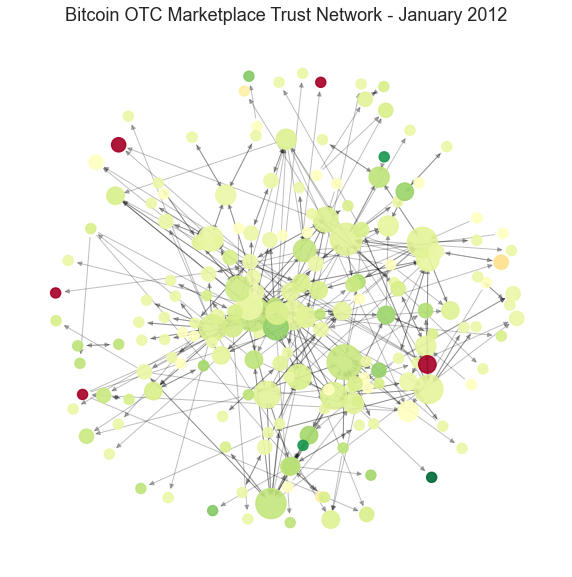

In [74]:
draw_network(2012,1)

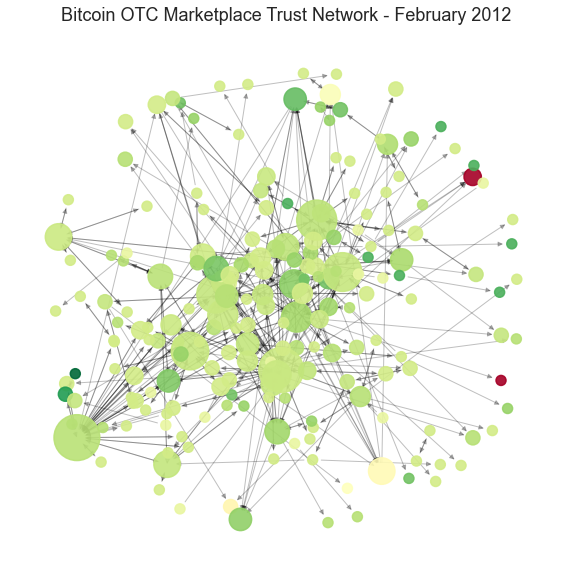

In [75]:
draw_network(2012,2)

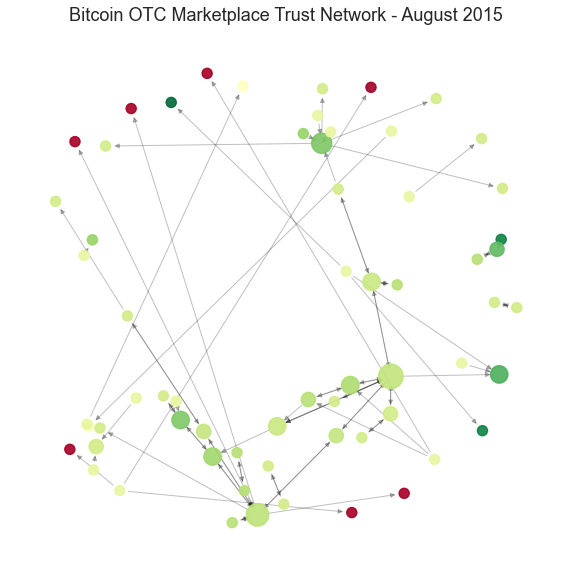

In [76]:
draw_network(2015,8)